# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [ ]:
!pip install citipy

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 609


In [3]:
cities

['boende',
 'tambacounda',
 'ushuaia',
 'yarmouth',
 'codrington',
 'waitangi',
 'west island',
 'kstovo',
 'bethel',
 'gudauri',
 'atafu village',
 'stanley',
 'terrace',
 'hermanus',
 'ivolginsk',
 'tiksi',
 'saipan',
 'llallagua',
 'avarua',
 'stornoway',
 'puerto natales',
 'ivanteyevka',
 'port-aux-francais',
 'talnakh',
 'belyy yar',
 'dzuunmod',
 'prince rupert',
 'utrik',
 'remire-montjoly',
 'grytviken',
 'margaret river',
 'kuala terengganu',
 'edinburgh of the seven seas',
 'zumpango del rio',
 'adamstown',
 'tazovsky',
 'albany',
 'brigantine',
 'olonkinbyen',
 'haiku-pauwela',
 'west samoset',
 'namibe',
 'zhob',
 'port elizabeth',
 'cam ranh',
 'hawaiian paradise park',
 'el calafate',
 'taulaga',
 'cabo san lucas',
 'isafjordur',
 'uacu cungo',
 'lingsugur',
 'bredasdorp',
 'polyarnyy',
 'east london',
 'ain beni mathar',
 'figuig (centre)',
 'wajir',
 'nasiriyah',
 'nova sintra',
 'avellaneda',
 'la passe',
 'jamestown',
 'grand falls-windsor',
 'chonchi',
 'yellowknife

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [ ]:
url =  f"http://api.openweathermap.org/data/2.5/weather?units=metrics&appid={weather_api_key}"

print(url + "&q=seattle")

In [4]:
# Set the API base URL
# Set the base URL for API request
url = f"http://api.openweathermap.org/data/2.5/weather?units=metrics&appid={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
# Create a for loop and an if statement to go through the cities in list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        # Run a request using requests.gets()
        # Use .json to format the data into a dictionary
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        # Parse out the data but indexing in the dictionary
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})


    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | boende
Processing Record 2 of Set 1 | tambacounda
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | yarmouth
Processing Record 5 of Set 1 | codrington
Processing Record 6 of Set 1 | waitangi
Processing Record 7 of Set 1 | west island
Processing Record 8 of Set 1 | kstovo
Processing Record 9 of Set 1 | bethel
Processing Record 10 of Set 1 | gudauri
City not found. Skipping...
Processing Record 11 of Set 1 | atafu village
Processing Record 12 of Set 1 | stanley
Processing Record 13 of Set 1 | terrace
Processing Record 14 of Set 1 | hermanus
Processing Record 15 of Set 1 | ivolginsk
Processing Record 16 of Set 1 | tiksi
Processing Record 17 of Set 1 | saipan
Processing Record 18 of Set 1 | llallagua
Processing Record 19 of Set 1 | avarua
Processing Record 20 of Set 1 | stornoway
Processing Record 21 of Set 1 | puerto natales
Processing Record 22 of Set 1 | ivanteyevka
Processing 

Processing Record 37 of Set 4 | kingston
Processing Record 38 of Set 4 | san patricio
Processing Record 39 of Set 4 | aasiaat
Processing Record 40 of Set 4 | irtyshsk
Processing Record 41 of Set 4 | tionk essil
Processing Record 42 of Set 4 | qaqortoq
Processing Record 43 of Set 4 | makaha
Processing Record 44 of Set 4 | kiama
Processing Record 45 of Set 4 | bireun
Processing Record 46 of Set 4 | howrah
Processing Record 47 of Set 4 | karratha
Processing Record 48 of Set 4 | bikenibeu village
Processing Record 49 of Set 4 | vieux fort
Processing Record 0 of Set 5 | belmonte
Processing Record 1 of Set 5 | puerto san carlos
City not found. Skipping...
Processing Record 2 of Set 5 | lucapa
Processing Record 3 of Set 5 | meybod
Processing Record 4 of Set 5 | tadine
Processing Record 5 of Set 5 | takamaka
City not found. Skipping...
Processing Record 6 of Set 5 | myeik
Processing Record 7 of Set 5 | udachny
Processing Record 8 of Set 5 | brusyliv
Processing Record 9 of Set 5 | gummi
Process

Processing Record 26 of Set 8 | tsiombe
Processing Record 27 of Set 8 | yemva
Processing Record 28 of Set 8 | mount pearl
Processing Record 29 of Set 8 | mahanoro
Processing Record 30 of Set 8 | alaghsas
Processing Record 31 of Set 8 | celendin
Processing Record 32 of Set 8 | little cayman
City not found. Skipping...
Processing Record 33 of Set 8 | emmett
Processing Record 34 of Set 8 | salekhard
Processing Record 35 of Set 8 | kaka
Processing Record 36 of Set 8 | vengerovo
Processing Record 37 of Set 8 | rumoi
Processing Record 38 of Set 8 | ardestan
Processing Record 39 of Set 8 | hood river
Processing Record 40 of Set 8 | viveiro
Processing Record 41 of Set 8 | revda
Processing Record 42 of Set 8 | great bend
Processing Record 43 of Set 8 | houlton
Processing Record 44 of Set 8 | santa ana
Processing Record 45 of Set 8 | roma
Processing Record 46 of Set 8 | broken hill
Processing Record 47 of Set 8 | undurkhaan
Processing Record 48 of Set 8 | kurchum
Processing Record 49 of Set 8 | 

Processing Record 16 of Set 12 | namanga
Processing Record 17 of Set 12 | muisne
Processing Record 18 of Set 12 | katsuura
Processing Record 19 of Set 12 | arauca
Processing Record 20 of Set 12 | nanyang
Processing Record 21 of Set 12 | sitka
Processing Record 22 of Set 12 | berdigestyakh
Processing Record 23 of Set 12 | morehead city
Processing Record 24 of Set 12 | khunti
Processing Record 25 of Set 12 | khekra
Processing Record 26 of Set 12 | san fernando
Processing Record 27 of Set 12 | nioki
Processing Record 28 of Set 12 | muynoq
Processing Record 29 of Set 12 | kuala belait
Processing Record 30 of Set 12 | warman
Processing Record 31 of Set 12 | ust'-kut
Processing Record 32 of Set 12 | cadale
Processing Record 33 of Set 12 | yampil'
Processing Record 34 of Set 12 | somerset
Processing Record 35 of Set 12 | kegen
Processing Record 36 of Set 12 | cobija
Processing Record 37 of Set 12 | san antonio oeste
Processing Record 38 of Set 12 | san julian
Processing Record 39 of Set 12 | 

In [5]:
# Convert the cities weather data into a Pandas DataFrame
# Use pd.dataframe() to turn data tabular
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          580
lat           580
Lng           580
Max Temp      580
Humidity      580
Cloudiness    580
Wind Speed    580
Country       580
Date          580
dtype: int64

In [6]:
# Display sample data
# Displaying top results of data
city_data_df.head()

,City,lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,boende,-0.2167,20.8667,296.01,93,100,0.68,CD,1695845230
1,tambacounda,13.7539,-13.7586,305.18,74,0,1.03,SN,1695845230
2,ushuaia,-54.8000,-68.3000,278.96,45,0,8.23,AR,1695845231
3,yarmouth,41.7057,-70.2286,291.23,73,0,6.26,US,1695845231
4,codrington,-38.2667,141.9667,280.56,96,24,3.62,AU,1695845108


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,boende,-0.2167,20.8667,296.01,93,100,0.68,CD,1695845230
1,tambacounda,13.7539,-13.7586,305.18,74,0,1.03,SN,1695845230
2,ushuaia,-54.8000,-68.3000,278.96,45,0,8.23,AR,1695845231
3,yarmouth,41.7057,-70.2286,291.23,73,0,6.26,US,1695845231
4,codrington,-38.2667,141.9667,280.56,96,24,3.62,AU,1695845108


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

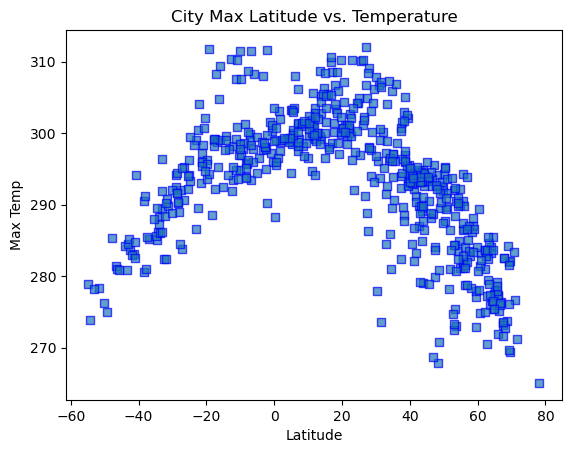

In [9]:
# Build scatter plot for latitude vs. temperature
# plt.scatter()
plt.scatter(
    city_data_df["lat"],
    city_data_df["Max Temp"],
    edgecolor="blue",
    linewidths=1,
    marker="s",
    alpha =0.7,
    label = "Cities"


)

# Incorporate the other graph properties
# Add Tittles, Legend, Time & Labels
#plt.title, plt.xlabel. plt.ylabel
plt.title("City Max Latitude vs. Temperature") 
plt.xlabel("Latitude")
plt.ylabel("Max Temp")


# Save the figure
# Use plt.savefig 
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

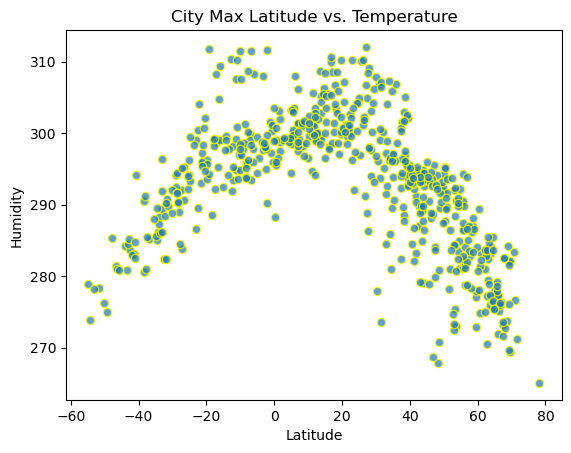

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(
    city_data_df["lat"],
    city_data_df["Max Temp"],
    edgecolor="yellow",
    linewidths=1,
    marker="o",
    alpha =0.7,
    label = "Cities"


)
# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature") 
plt.xlabel("Latitude")
plt.ylabel("Humidity")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

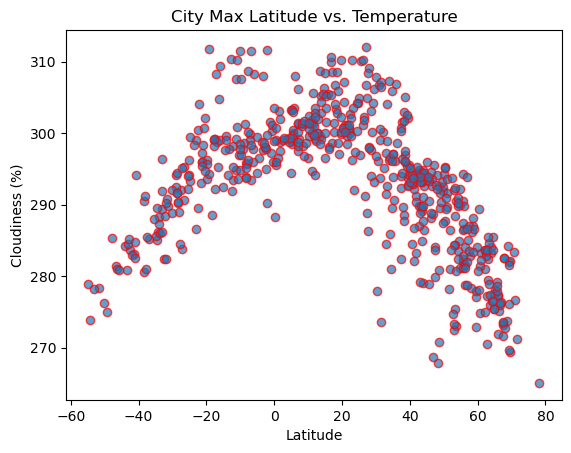

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(
    city_data_df["lat"],
    city_data_df["Max Temp"],
    edgecolor="red",
    linewidths=1,
    marker="o",
    alpha =0.7,
    label = "Cities"


)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature") 
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

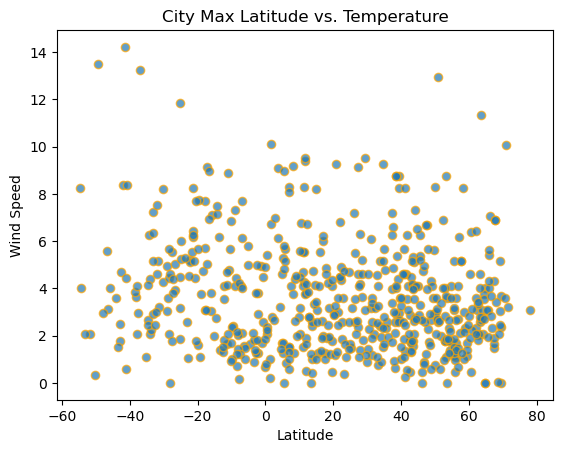

In [13]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(
    city_data_df["lat"],
    city_data_df["Wind Speed"],
    edgecolor="orange",
    linewidths=1,
    marker="o",
    alpha =0.7,
    label = "Cities"


)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature") 
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Define a function to create Linear Regression plots
def liner_regression(x_value,y_value,title, text_coord):
    
    
    
    # Calculate Linear Regression 
    (slope, intercept, rvalue,pvalue,stderr) = lineregress(x_value, y_value)
    regress_value = x_value * slope + intercept
    line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
    
    
    plt.scatter(x_value, y_value)
    plt.plot(x_value, regress_value, "r-")
    plt.annotate(line_eq, text_coord, fontsize= 13, color="blue")
    plt.xlabel("lat")
    plt.ylabel(title)
    
    
    print(f"The r-value is {rvalue**2}")
    
    plt.show
    
    

In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,tambacounda,13.7539,-13.7586,305.18,74,0,1.03,SN,1695845230
3,yarmouth,41.7057,-70.2286,291.23,73,0,6.26,US,1695845231
7,kstovo,56.1473,44.1979,278.81,75,9,1.09,RU,1695845232
8,bethel,41.3712,-73.4140,294.03,58,0,4.63,US,1695845092
10,stanley,54.8680,-1.6985,289.92,89,75,4.12,GB,1695845065


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["lat"] < 0]
# Display sample data
southern_hemi_df.head()

,City,lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,boende,-0.2167,20.8667,296.01,93,100,0.68,CD,1695845230
2,ushuaia,-54.8000,-68.3000,278.96,45,0,8.23,AR,1695845231
4,codrington,-38.2667,141.9667,280.56,96,24,3.62,AU,1695845108
5,waitangi,-43.9535,-176.5597,284.16,97,94,3.58,NZ,1695845231
6,west island,-12.1568,96.8225,298.14,83,75,4.12,CC,1695845232


###  Temperature vs. Latitude Linear Regression Plot

In [ ]:
# Linear regression on Northern Hemisphere
# 5 through -10 are good plot value points
x_values = northern_hemi_df["lat"]
y_values = northern_hemi_df["Max Temp"]
linear_regression(x_values, y_values, "Max Temp", (50,20))

In [ ]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["lat"]
y_values = sothern_hemi_df["Max Temp"]
linear_regression(x_values, y_values, "Max Temp", (-60,6))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
x_values = northern_hemi_df["lat"]
y_values = northern_hemi_df["humidity"]
linear_regression(x_values, y_values, "humidity", (50,20))

In [ ]:
# Southern Hemisphere
x_values = southern_hemi_df["lat"]
y_values = southern_hemi_df["humidity"]
linear_regression(x_values, y_values, "humidity", (-50,30))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
x_values = northern_hemi_df["lat"]
y_values = northern_hemi_df["cloudiness"]
linear_regression(x_values, y_values, "cloudiness", (40,20))

In [ ]:
# Southern Hemisphere
x_values = northern_hemi_df["lat"]
y_values = northern_hemi_df["cloudiness"]
linear_regression(x_values, y_values, "cloudiness", (-50,30))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
x_values = northern_hemi_df["lat"]
y_values = northern_hemi_df["Wind Speed"]
linear_regression(x_values, y_values, "Wind Speed", (-50,30))

In [ ]:
# Southern Hemisphere
x_values = southern_hemi_df["lat"]
y_values = southern_hemi_df["Wind Speed"]
linear_regression(x_values, y_values, "Wind Speed", (-50,30))

**Discussion about the linear relationship:** YOUR RESPONSE HERE